### 영상처리 4주차

In [13]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    frame = cv2.resize(frame, (480, 270))
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gray_b = 255 -gray

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, "Hello", (50,100), font, 1, (255,255,0), 4)

    cv2.imshow('frame', frame)
    cv2.imshow('gray', gray)
    cv2.imshow('gray_b', gray_b)

    key = cv2.waitKey(35)

    if key == 27:
        break

if cap.isOpened():
    cap.release()

cv2.destroyAllWindows()

### 5.11 

In [2]:
# 0511.py
import cv2
import numpy as np

src = np.array([[2, 2, 4, 4],
                [2, 2, 4, 4],
                [4, 4, 4, 4],
                [4, 4, 4, 4]
              ], dtype=np.uint8)
#1
# 칼라는 안되고 흑백만 된다
dst = cv2.equalizeHist(src)
print('dst =', dst)

#2
'''
ref: https://docs.opencv.org/master/d5/daf/tutorial_py_histogram_equalization.html
'''
##hist = cv2.calcHist(images = [src], channels = [0], mask = None,
##                    histSize = [256], ranges = [0, 256])
hist,bins = np.histogram(src.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0) # cdf에서 0을 True 마스킹  
T = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
T = np.ma.filled(T, 0).astype('uint8') # 마스킹을 0으로 채우기 
dst2 = T[src] # dst2 == dst
print('dst2 =', dst2)


dst = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]
dst2 = [[  0   0 255 255]
 [  0   0 255 255]
 [255 255 255 255]
 [255 255 255 255]]


### 5.12

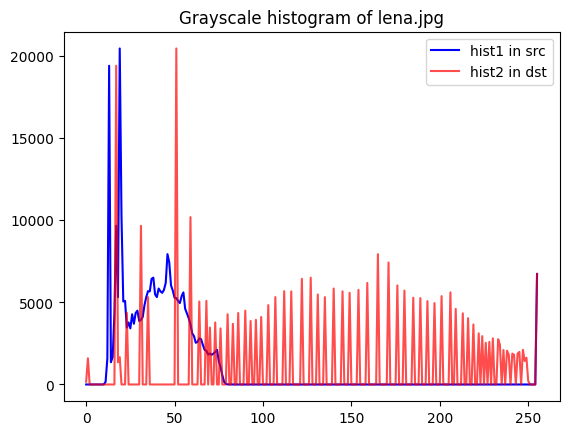

In [6]:
# 0512.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt

src = cv2.imread('c:/data/fruit.PNG', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src) # 이퀄라이저 히스토그램
cv2.imshow('dst', dst)
cv2.imshow('src', src)
cv2.waitKey()    
cv2.destroyAllWindows()

plt.title('Grayscale histogram of lena.jpg')

# 원본 src
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist1, color='b', label='hist1 in src')

# cv2.equalizeHist(src) 적용한 것, dst
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
plt.plot(hist2, color='r', alpha=0.7, label='hist2 in dst')
plt.legend(loc='best')
plt.show()

### 5.13

In [13]:
# 0513.py
import cv2
import numpy as np

src = cv2.imread('c:/data/lena.jpg')
src = cv2.resize(src, (400, 400))
cv2.imshow('src',  src)

#1
# HSV 색상, 채도, 명도
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) # HSV 변환
h, s, v = cv2.split(hsv) # 나누기

v2 = cv2.equalizeHist(v) # 밝기 값 이퀄라이징
hsv2 = cv2.merge([h, s, v2]) # 합치기
dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR) # 다시 BGR로 변환
cv2.imshow('hsv',  dst)

#2
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cv = cv2.split(yCrCv)

y2 = cv2.equalizeHist(y) # 밝기 값 이퀄라이징
yCrCv2 = cv2.merge([y2, Cr, Cv])
dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)

cv2.imshow('yCrCv',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()

### 그냥 한 번 읽어보기

* https://ko.wikipedia.org/wiki/HSV_%EC%83%89_%EA%B3%B5%EA%B0%84
* https://en.wikipedia.org/wiki/HSL_and_HSV

### 비디오 캡처한 걸 이퀄라이징

In [1]:
# 0513.py
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    if not ret:
        break

    src = cv2.resize(frame, (500, 500))
    cv2.imshow('src',  src)

    hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV) # HSV 변환
    h, s, v = cv2.split(hsv) # 나누기
    v2 = cv2.equalizeHist(v) # 밝기 값 이퀄라이징
    hsv2 = cv2.merge([h, s, v2]) # 합치기
    dst    = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR) # 다시 BGR로 변환
    cv2.imshow('hsv', dst)

    #2
    yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
    y, Cr, Cv = cv2.split(yCrCv)
    y2 = cv2.equalizeHist(y) # 밝기 값 이퀄라이징
    yCrCv2 = cv2.merge([y2, Cr, Cv])
    dst2    = cv2.cvtColor(yCrCv2, cv2.COLOR_YCrCb2BGR)
    cv2.imshow('yCrCv', dst2)

    key = cv2.waitKey(35)

    if key == 27:
        break

    if key == ord('p'):
        cv2.imwrite("./src.png", src)
        cv2.imwrite("./hsv.png", dst)
        cv2.imwrite("./yCrCv.png", dst2)

cv2.destroyAllWindows()

### 5.1

In [31]:
# 0501.py
import cv2
import numpy as np
src = cv2.imread('c:/data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
src = cv2.resize(src, (200, 400))
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 60, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

# cv2.THRESH_OTSU 중간 값을 찾는 것
ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()

ret= 60.0
ret2= 148.0


### 5.2

In [34]:
# 0502.py
import cv2
import numpy as np
src = cv2.imread('c:/data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
src = cv2.resize(src, (400, 300))
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()

### 5.3

In [35]:
# 0503.py
import cv2
import numpy as np

src = np.array([[0, 0, 0, 0],
              [1, 1, 3, 5],
              [6, 1, 1, 3],
              [4, 3, 1, 7]
              ], dtype=np.uint8)

# histSize=[8], ranges=[0, 8] 0~7을 따로 계산
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[8], ranges=[0, 8])
print('hist1 = ', hist1)

# histSize=[8], ranges=[0, 8] 0~7을 두 개씩 계산
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 8])
print('hist1 = ', hist1)

# histSize=[4], ranges=[0, 4] 0~3을 하나 씩 계산
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[4], ranges=[0, 4])
print('hist2 = ', hist2)

hist1 =  [[4.]
 [5.]
 [0.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]]
hist1 =  [[9.]
 [3.]
 [2.]
 [2.]]
hist2 =  [[4.]
 [5.]
 [0.]
 [3.]]
